In [1]:
# KNN test
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from utils import accuracy_score
from knn import KNN

test_size = 0.2
seed = 1234
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
knn = KNN(k=5)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.9666666666666667


mean squarred error is 305.7719958301902


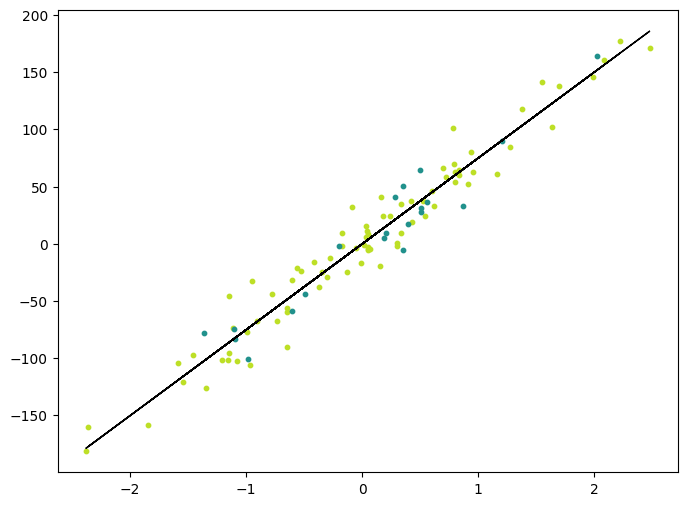

In [2]:
# Linear Regression test
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from linear_regression import LinearRegression
from utils import mse

X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

regressor = LinearRegression(lr=.01)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
mse_value = mse(y_test, predictions)
print(f'mean squarred error is {mse_value}')

fig = plt.figure(figsize=(8, 6))
y_pred_line = regressor.predict(X)
cmap = plt.get_cmap('viridis')
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=1, label='Prediction')
plt.show()

In [3]:
# Logistic Regression test
from sklearn.datasets import load_breast_cancer
from logistic_regression import LogisticRegression

dataset = load_breast_cancer()
X, y = dataset.data, dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
classifier = LogisticRegression(lr=0.0001, n_iters=1000)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.9298245614035088


In [4]:
# Naive Bayes test
from sklearn.datasets import make_classification
from naive_bayes import NaiveBayes

X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
nb = NaiveBayes()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(accuracy)


0.965


1.0


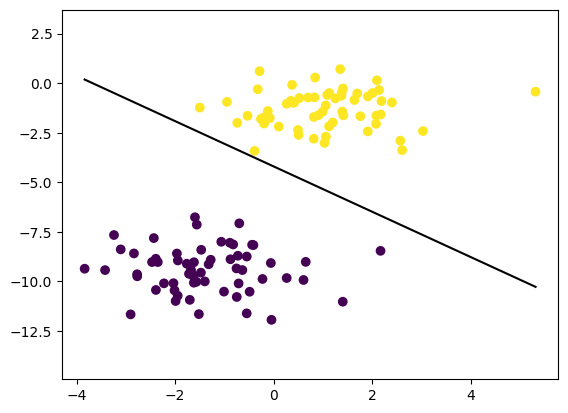

In [6]:
# Perceptron test
from sklearn.datasets import make_blobs
from perceptron import Perceptron
import numpy as np

X, y = make_blobs(n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
p = Perceptron(learning_rate=0.01, n_iters=1000)
p.fit(X_train, y_train)
predictions = p.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(accuracy) 

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train)

x0_1 = np.amin((X_train[:, 0]))
x0_2 = np.amax((X_train[:, 0]))

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], 'k')
ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])
ax.set_ylim([ymin-3, ymax+3])
plt.show()
